In [1]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('ml-zoomcamp-02-regression-homework')
jovian.set_colab_id('1Rjvn9MI9KJ8RKQfEhNFO-RBJsP1UnnRz')

     |████████████████████████████████| 68 kB 7.8 MB/s 


# ml-zoomcamp-02-regression-homework

Use the "Run" button to execute the code.

In [2]:
!pip install jovian --upgrade --quiet

In [3]:
import jovian

In [4]:
!python --version

Python 3.7.14


# Downlad the data:


In [9]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv'

In [10]:
!wget $data

--2022-09-18 18:21:57--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: ‘housing.csv’

housing.csv         100%[===================>]   1.36M  --.-KB/s    in 0.009s  

2022-09-18 18:21:57 (155 MB/s) - ‘housing.csv’ saved [1423529/1423529]



The goal of this homework is to create a regression model for predicting housing prices (column `'median_house_value'`)

In [160]:
import pandas as pd
import numpy as np

# Data understanding:


In [187]:
df = pd.read_csv('housing.csv')
df.shape

(20640, 10)

In [188]:
# the best thing i learnt in this homework
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [189]:
df.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY


In [190]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

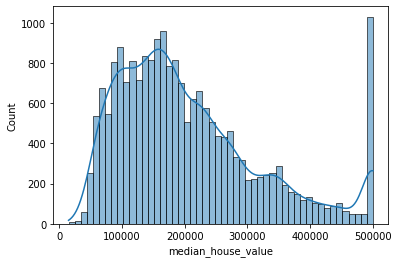

In [191]:
sns.histplot(df.median_house_value, bins=50, kde = True)

# Data Preparation:

In [192]:
selected_df = df[['latitude', 'longitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']]
selected_df.columns

Index(['latitude', 'longitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [193]:
selected_df.isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

In [194]:
selected_df['population'].quantile(0.5)

1166.0

## Split the data

In [195]:
n = len(selected_df)
idx = np.arange(n)

In [196]:
np.random.seed(42)
np.random.shuffle(idx)

In [197]:
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [198]:
df_train = selected_df.iloc[:n_train]
df_val = selected_df.iloc[n_train:n_train+n_val]
df_test = selected_df.iloc[n_train+n_val:]

In [199]:
df_train.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,37.85,-122.25,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [200]:
len(df_train), len(df_val), len(df_test)

(12384, 4128, 4128)

In [201]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

### Apply the log transformation to the median_house_value variable using the np.log1p() function.

In [202]:
y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

### Make sure that the target value ('median_house_value') is not in your dataframe.

In [203]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [204]:
len(y_train)

12384

# Modeling: 

In [205]:
def dot(xi, w):
    n = len(xi)
    
    res = 0.0
    
    for j in range(n):
        res = res + xi[j] * w[j]
    
    return res

In [206]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

## Model 1 and 2

In [207]:
df_train.columns

Index(['latitude', 'longitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')

In [208]:
base = ['latitude', 'longitude', 'housing_median_age', 'total_rooms','total_bedrooms', 'population', 'households', 'median_income']

### Model 1 - ( filing with 0)

In [183]:
X_train = df_train[base].fillna(0).values

In [184]:
w0, w = train_linear_regression(X_train, y_train)

In [185]:
y_pred = w0 + X_train.dot(w)

In [186]:
w0

-7.059548347410757

In [149]:
w

array([-2.65525738e-01, -2.32804925e-01,  2.03818397e-03, -2.39292899e-05,
        2.73540355e-04, -2.09229211e-04,  5.15250967e-04,  1.73431312e-01])

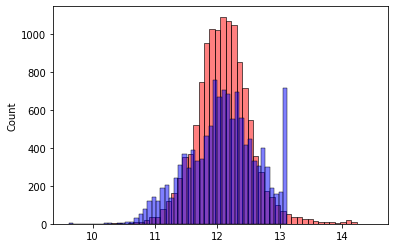

In [150]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

In [209]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return round(np.sqrt(mse), 2)

In [152]:
rmse(y_train, y_pred)

0.35

##### VAlidating the model 1

In [210]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [211]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

0.36

### MOdel 2 (wiht mean from teh training dataset)

In [212]:
df_train['total_bedrooms'].mean()

531.3334420348932

In [213]:
X_train = df_train[base].fillna(df_train['total_bedrooms'].mean()).values # not a recommended way to replace the values in a dataset
w0, w = train_linear_regression(X_train, y_train)
y_pred = w0 + X_train.dot(w)
w0,w

(-7.214517007112548,
 array([-2.66476506e-01, -2.34312195e-01,  2.05709434e-03, -2.90442687e-05,
         3.81922519e-04, -2.04999819e-04,  4.13816848e-04,  1.75098787e-01]))

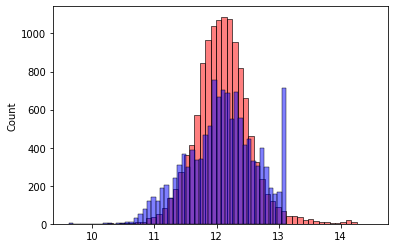

In [214]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

In [215]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(df_train['total_bedrooms'].mean())
    X = df_num.values
    return X

In [216]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

0.36

## Model 3 (with regularization )

In [217]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [218]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [219]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=0.01)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

0.36

# Evaluation: 


In [221]:
# Tuning the model
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    
    print('r >> ', r,'weight >> ', w0,'rmse >> ', score)

r >>  0 weight >>  -7.059548347410757 rmse >>  0.36
r >>  1e-06 weight >>  -7.0595355111505995 rmse >>  0.36
r >>  0.0001 weight >>  -7.058264959870815 rmse >>  0.36
r >>  0.001 weight >>  -7.046735424138149 rmse >>  0.36
r >>  0.01 weight >>  -6.933477457173158 rmse >>  0.36
r >>  0.1 weight >>  -5.973335062665495 rmse >>  0.37
r >>  1 weight >>  -2.5034893459004213 rmse >>  0.37
r >>  5 weight >>  -0.6967782940468084 rmse >>  0.38
r >>  10 weight >>  -0.36493396950144574 rmse >>  0.38


# Model and Evaluation for diff seed

In [230]:
rsme_scores = []
def train_linear_regression_seed(seed):
  n = len(selected_df)
  idx = np.arange(n)

  #print(seed)
  np.random.seed(seed)
  np.random.shuffle(idx)

  n_val = int(n * 0.2)
  n_test = int(n * 0.2)
  n_train = n - n_val - n_test

  df_train = selected_df.iloc[:n_train]
  df_val = selected_df.iloc[n_train:n_train+n_val]
  df_test = selected_df.iloc[n_train+n_val:]

  df_train = df_train.reset_index(drop=True)
  df_val = df_val.reset_index(drop=True)
  df_test = df_test.reset_index(drop=True)

  y_train = np.log1p(df_train.median_house_value.values)
  y_val = np.log1p(df_val.median_house_value.values)
  y_test = np.log1p(df_test.median_house_value.values)

  del df_train['median_house_value']
  del df_val['median_house_value']
  del df_test['median_house_value']


  def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

  def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

  def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

  X_train = prepare_X(df_train)
  w0, w = train_linear_regression(X_train, y_train)

  X_val = prepare_X(df_val)
  y_pred = w0 + X_val.dot(w)
  score = rmse(y_val, y_pred)
  rsme_scores.append(score)

for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
  train_linear_regression_seed(seed)

rsme_scores

[0.3625894325051431,
 0.3625894325051431,
 0.3625894325051431,
 0.3625894325051431,
 0.3625894325051431,
 0.3625894325051431,
 0.3625894325051431,
 0.3625894325051431,
 0.3625894325051431,
 0.3625894325051431]

In [231]:
print('std: ', np.std(rsme_scores))

std:  0.0


# QUestion 6:

In [233]:
n = len(selected_df)
idx = np.arange(n)

#print(seed)
np.random.seed(seed)
np.random.shuffle(idx)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

df_train = selected_df.iloc[:n_train]
df_val = selected_df.iloc[n_train:n_train+n_val]
df_test = selected_df.iloc[n_train+n_val:]

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

df_full_train = pd.concat([df_train, df_val])

df_full_train = df_full_train.reset_index(drop=True)

X_full_train = prepare_X(df_full_train)
y_full_train = np.concatenate([y_train, y_val])
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
score

0.32

# Deployment ( In the future ) : 

In [234]:
# Execute this to save new versions of the notebook
jovian.commit(project="ml-zoomcamp-02-regression-homework")

[jovian] Detected Colab notebook...
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ··········
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/pknayak0707-job/ml-zoomcamp-02-regression-homework


'https://jovian.ai/pknayak0707-job/ml-zoomcamp-02-regression-homework'

# References:

* [02-Regression notebook used in teh Sep 2022 ml-zoomcamp lectures](https://github.com/MekongDelta-mind/mlbookcamp-code/blob/master/course-zoomcamp/02-regression/notebook.ipynb)

* [02-Regression notebook used in teh Sep 2021 (prev year ) ml-zoomcamp lectures](https://github.com/alexeygrigorev/mlbookcamp-code/blob/master/chapter-02-car-price/02-carprice.ipynb)

* Historgram different versions:
  - https://www.sharpsightlabs.com/blog/seaborn-histogram/#example-6

Future Work:
- create the blog with common graphs you use for your analysis